In [1]:
# Importing important libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Extracting the dataset
iris = load_iris()

In [3]:
# Loading the data into a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Checking the types
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [5]:
# appending the target column
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Using the string labels
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Different labels
df['label'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: label, dtype: int64

In [8]:
# One Hot Encoding
label = pd.get_dummies(df['label'], prefix = 'label')
df = pd.concat([df, label], axis = 1)

# Dropping the old labels
df.drop(['label'], axis = 1, inplace = True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [9]:
# Separating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [11]:
# Checking the shapes
print('X_train shape is : ', X_train.shape)
print('X_test shape is : ', X_test.shape)
print('y_train shape is : ', y_train.shape)
print('y_test shape is : ', y_test.shape)

X_train shape is :  (120, 4)
X_test shape is :  (30, 4)
y_train shape is :  (120, 3)
y_test shape is :  (30, 3)


In [12]:
# Importing remaining functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [13]:
# Creating a Sequential Model
model = Sequential([
    Dense(64, input_shape = (4,), activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

In [14]:
# Printing the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 21,251
Trainable params: 21,251
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Creating a Sequential Model with Batch Normalized Layers
model_1 = Sequential([
    Dense(64, input_shape = (4,), activation = 'relu'),
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dense(3, activation = 'softmax')
])

In [16]:
# Printing the summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [ ]:
# BatchNormalization() is used to normalize the activation of previous layer 
# at each batch by default.

In [17]:
# Importing some functions
from tensorflow.keras.initializers import RandomNormal, Constant

In [26]:
# Creating a Sequential Model with Batch Normalized Layers
model_2 = Sequential([
    Dense(64, input_shape = (4,), activation = 'relu'),
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dense(64, activation = 'relu'),
    BatchNormalization(
        momentum = 0.95,
        epsilon = 0.005,
        beta_initializer = RandomNormal(mean = 0.00, stddev = 0.05),
        gamma_initializer = Constant(value = 0.9)),
    Dense(3, activation = 'softmax')
])

In [19]:
# Printing the summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [28]:
# Compiling the model
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [29]:
# Fitting the model
history = model_2.fit(
    X_train,
    y_train,
    epochs = 200,
    validation_split = 0.25,
    batch_size = 40,
    verbose = 1)

Epoch 1/200
3/3 [==============================] - 0s 98ms/step - loss: 1.5361 - accuracy: 0.3444 - val_loss: 1.1854 - val_accuracy: 0.3333
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6184 - accuracy: 0.7667 - val_loss: 1.1020 - val_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.3014 - accuracy: 0.9000 - val_loss: 1.0441 - val_accuracy: 0.3333
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.2228 - accuracy: 0.9444 - val_loss: 1.0067 - val_accuracy: 0.4667
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 0.1492 - accuracy: 0.9667 - val_loss: 0.9811 - val_accuracy: 0.7333
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0945 - accuracy: 0.9889 - val_loss: 0.9613 - val_accuracy: 0.7667
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0827 - accuracy: 1.0000 - val_loss: 0.9474 - val_accuracy: 0.7333
Epoch 8/200
3/3 [===

Epoch 59/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.4249 - val_accuracy: 0.8333
Epoch 60/200
3/3 [==============================] - 0s 14ms/step - loss: 0.1260 - accuracy: 0.9778 - val_loss: 0.4099 - val_accuracy: 0.8667
Epoch 61/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0927 - accuracy: 0.9778 - val_loss: 0.3956 - val_accuracy: 0.8667
Epoch 62/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0187 - accuracy: 0.9889 - val_loss: 0.3525 - val_accuracy: 0.9000
Epoch 63/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 64/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0622 - accuracy: 0.9778 - val_loss: 0.2933 - val_accuracy: 0.9667
Epoch 65/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1834 - accuracy: 0.9556 - val_loss: 0.2664 - val_accuracy: 1.0000
Epoch 66/200


Epoch 117/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0273 - accuracy: 0.9778 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0455 - accuracy: 0.9889 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 27ms/step - loss: 0.0279 - accuracy: 0.9889 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 120/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 121/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 122/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 

Epoch 175/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 179/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0734 - accuracy: 0.9889 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9667
Epoch 

In [30]:
# Model_Evaluation
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([['train_'+metric, 'val_'+metric]])
    plt.show()

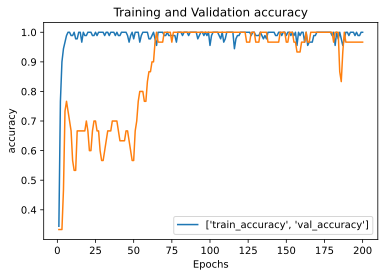

In [31]:
# Plot
plot_metric(history, 'accuracy')

In [33]:
# Evaluating the model on testing data
model_2.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.8333


[0.4958398938179016, 0.8333333134651184]